## Введение. Постановка целей и задач.

*«Тот, кто не помнит своего прошлого, обречен на то, чтобы пережить его вновь»*

*Джордж Сантаяна*


Одно из наиважнейших достижений человечества - это работа с данными.

Накопление данных, их обработка и интерпретация позволили человечеству разрабатывать новые технологии, учреждать новые науки, которые сделали жизнь проще и качественно лучше. Наиболее важный аспект современного общества - экономика - также не является исключением.

Без устойчивой экономики, направленной на удовлетворение базовых нужд человека, невозможно обратить внимание на науку и развитие техники. Как и в любом социальном явлении, в экономике существуют периоды роста, стагнации и падения, именуемого также кризис. Кризисы в экономике государства не проходят бесследно: бюджеты, изначально распланированные на менее материальные вещи (наука, исследвания, технологии), государству приходится распределять на поддержание всего института экономики, во избежание краха.

Анализ макроэкономических показателей прошлых лет позволяет предвосхитить будущие кризисы, а также, на основе экстраполяции, попытаться смоделировать состояние макроэкономических показателей на будущий год. В случае негативного прогноза у правительства будут возможности принять решения для нивелирования назревающего кризиса, а также, в рамках разумного, досчить роста экономики страны.

**Цель данной работы** - построить модель, анализирующую прошлые периоды и эффективно предсказывающую дальнейшее движение макроэкономических показателей.

**Задачи работы**:
1.   Изучить макроэкономические показатели на примере Соединенных Штатов Америки прошлых лет.
2.   Выявить зависимые и независимые макроэкономические показатели.
3.   Применить различные модели прогнозирования макроэкономических показателей.
4.   Оценить ошибки моделей и выбрать наиболее актуальную для прогнозирования макроэкономических показателей.

### Импорт Датафрейма, библиотек, написание функций.

Для решения задач и последующего достижения цели будет использоваться язык программирования **Python**.

*Python - высокоуровневый, мультипарадигменный язык программирования. За счёт высокой гибкости Python является одновременно простым в освоении и очень эффективным языком программирования. Разработанные группами энтузиастов модули и пакеты позволяют решить большой стек задач в рамках одного языка программирования.*

В настоящей работе будут использованы следующие модули и пакеты языка программирования Python:

In [ ]:
!pip install pmdarima # Pmdarima - пакет для аналитики временных рядов
import statsmodels.api as sm # Statsmodels - пакет для выполнения статистического анализа датасетов
import numpy as np # NumPy - пакет для поддержки методов высшей математики и работы с числовыми массивами данных
import pandas as pd # Pandas - пакет для работы с датафреймами
import matplotlib.pyplot as plt # Matplotlib - пакет для построения графиков на основе данных
from sklearn.model_selection import train_test_split # Из пакета Scikit-learn возьмем функцию train_test_split для разделения готового датасета на тренировочную и тестовую выборки
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX - модуль для сезонной авторегрессии временного ряда
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Plot_acf и Plot_pacf - модули для добавления результатов авторегрессии на график
from statsmodels.tsa.seasonal import seasonal_decompose # seasonal_decompose - функция для проверки временного ряда на предмет сезонности
from pmdarima import auto_arima # auto_arima - функция для подбора параметров для моделей вида ARIMA
from sklearn.metrics import mean_squared_error # MSE - функция среднеквадратичной ошибки для оценки эффективности модели
from sklearn.metrics import mean_absolute_percentage_error # MAPE - функция средней абсолютной ошибки в процентах для оценки эффективности модели
from statsmodels.tsa.stattools import adfuller # Тест Дики-Фуллера на стационарность временного ряда
from statsmodels.tsa.ar_model import AutoReg # AR - модель авторегрессии на основе предыдущих наблюдений
from statsmodels.tsa.arima.model import ARIMA # MA - модель авторегрессии на основе остаточных ошибок от среднего предыдущих наблюдений

np.random.seed(100500) # устанавливаем зерно для одного и того же набора случайных чисел вне зависимости от запуска

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.3 MB/s eta 0:00:00


В качестве источника данных будет использован публичный датасет из библиотеки Statsmodels (https://www.statsmodels.org/devel/datasets/generated/macrodata.html)

In [ ]:
df = sm.datasets.macrodata.load_pandas().data

### Знакомство с данными.

После успешного импорта данных рассмотрим первую строку датасета и рассмотрим, какие макроэкономические показатели показатели нам доступны

In [ ]:
df[:1]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.0,0.0


В порядке появляния представлены следующие столбцы:
1.   year - год сбора статистики
2.   quarter - квартал сбора статистики
3.   realgdp - реальный ВВП на душу населения, миллиард долларов США
4.   realcons - реальный траты частного сектора, миллиард долларов США
5.   realinv - реальные инвестиции частного сектора, миллиард долларов США
6.   realgovt - реальные траты и инвестиции государственного сектора, миллиард долларов США
7.   realdpi - реальный распологаемый доход частного сектора, миллиард долларов США
8.   cpi - индекс потребительских цен, %
9.   m1 - денежная масса (валюта, чеки, вклады до востребования), миллиард долларов США
10.  tbilrate - средний процент за три месяца по гособлигациям, %
11.  unemp - индекс безработицы, %
12.  pop - население, миллион человек
13.  infl - процент инфляции (отношение индекса потребительских цен к прошлому периоду), %
14.  realint - реальная процентная ставка по гособлигациям (процент по гособлигациям за вычетом инфляции), %


Увидев первую запись в датасете вызовем последнюю запись для определения временного ряда.

In [ ]:
df[-1:]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


Данные представлены за период с 1 квартала 1959 по 3 квартал 2009 года.

## Предобработка данных

### Фильтрация данных

Количество макроэкономических показателей в настоящем датасете исчерыпывающе, поэтому оценим возможность избавиться от некоторых показателей, которые дублируют друг друга по смыслу.

Исходя из научной литературы, экономический кризис выражается в следующем изменении макроэкономических показателей:

*   Снижение реального ВВП
*   Рост безработицы
*   Снижение денежной массы
*   Рост инфляции
*   Снижение реального распологаемого дохода населения

Таким образом, можно пренебречь столбцами realcons, realinv, realgovt (перечисленные столбцы являются составляющими realgdp), cpi (поскольку он уже выражен в столбце infl), tbilrate, pop и realint (в настоящей работе непоказательны).



In [ ]:
df1 = df[["year", "quarter", "realgdp", "realdpi", "m1", "unemp", "infl"]]
df1

,year,quarter,realgdp,realdpi,m1,unemp,infl
0,1959.0,1.0,2710.349,1886.9,139.7,5.8,0.00
1,1959.0,2.0,2778.801,1919.7,141.7,5.1,2.34
2,1959.0,3.0,2775.488,1916.4,140.5,5.3,2.74
3,1959.0,4.0,2785.204,1931.3,140.0,5.6,0.27
4,1960.0,1.0,2847.699,1955.5,139.6,5.2,2.31
...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9838.3,1474.7,6.0,-3.16
199,2008.0,4.0,13141.920,9920.4,1576.5,6.9,-8.79
200,2009.0,1.0,12925.410,9926.4,1592.8,8.1,0.94
201,2009.0,2.0,12901.504,10077.5,1653.6,9.2,3.37


### Обработка пропусков

Для быстрой проверки на пустые значения в датасете воспользуемся функцией Pandas **isnull**

In [ ]:
pd.isnull(df1).sum()

year       0
quarter    0
realgdp    0
realdpi    0
m1         0
unemp      0
infl       0
dtype: int64

Функция показала, что пропусков нет, и можно приступать к следующему этапу работы

### Вывод по задачам 1 и 2


Мы ознакомились с датасетом макроэкономических показателей Соединенных Штатов Америки, описали данные в столбцах, а также выбрали интересующие нас данные для дальнейшего анализа и интерпретации.

## EDA или разведочный анализ данных.

Для подготовки данных к анализу и размещению на графиках заменим встроенные индексы на индекс на основе дат. Для этого воспользуемся инструментами Statsmodels и Pandas.

In [ ]:
dates = sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3')
index = pd.DatetimeIndex(dates)
df1.set_index(index, inplace=True)
df1

,year,quarter,realgdp,realdpi,m1,unemp,infl
1959-03-31,1959.0,1.0,2710.349,1886.9,139.7,5.8,0.00
1959-06-30,1959.0,2.0,2778.801,1919.7,141.7,5.1,2.34
1959-09-30,1959.0,3.0,2775.488,1916.4,140.5,5.3,2.74
1959-12-31,1959.0,4.0,2785.204,1931.3,140.0,5.6,0.27
1960-03-31,1960.0,1.0,2847.699,1955.5,139.6,5.2,2.31
...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9838.3,1474.7,6.0,-3.16
2008-12-31,2008.0,4.0,13141.920,9920.4,1576.5,6.9,-8.79
2009-03-31,2009.0,1.0,12925.410,9926.4,1592.8,8.1,0.94
2009-06-30,2009.0,2.0,12901.504,10077.5,1653.6,9.2,3.37


После того, как в качестве индексов стали использоваться соответствующие даты, мы можем убрать лишние колонки с годом и кварталом отдельно

In [ ]:
df2 = df1[['realgdp', 'realdpi', 'm1', 'unemp', 'infl']]

Оставшийся датасет попробуем проанализировать методами математической статистики при помощи пакета Pandas

In [ ]:
df2.describe()

,realgdp,realdpi,m1,unemp,infl
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,7221.171901,5310.540887,667.927586,5.884729,3.961330
std,3214.956044,2423.515977,455.346381,1.458574,3.253216
min,2710.349000,1886.900000,139.600000,3.400000,-8.790000
25%,4440.103500,3276.950000,228.650000,4.900000,2.270000
50%,6559.594000,4959.400000,540.900000,5.700000,3.240000
75%,9629.346500,6977.850000,1102.100000,6.800000,4.975000
max,13415.266000,10077.500000,1673.900000,10.700000,14.620000


Рассмотрим два макроэкономических показателя, традиционно связанных друг с другом - это уровень инфляции и уровень безработицы.

Согласно теоретическим исследованиям английского экономиста Уильяма Филлипса, есть логическая связь между инфляцией и безработицей. Экономист объяснил феномен тем, что низкий уровень безработицы повышает как общий уровень цен, так и размеры заработной платы, что, в свою очередь, повышает инфляцию.

Попробуем графически изобразить два данных макроэкономических показателя во времени.

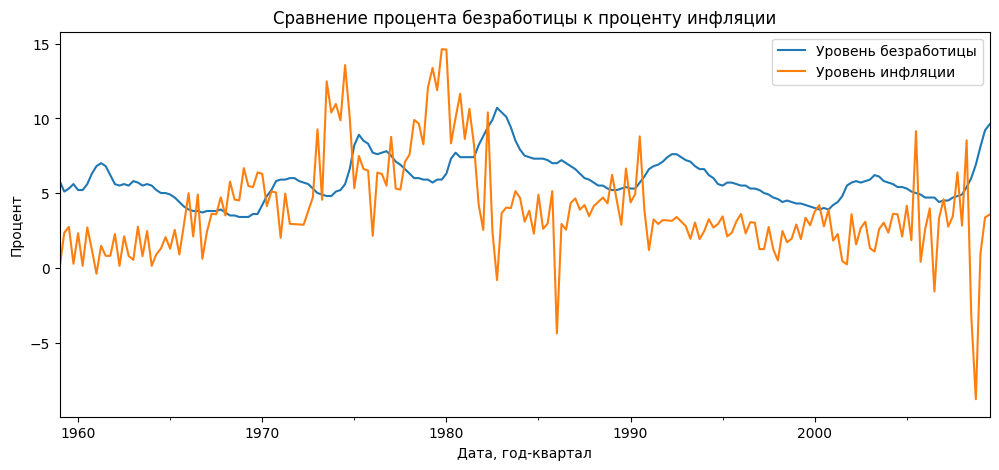

In [ ]:
plot = df2[['unemp','infl']].plot(figsize=(12,5))
plt.xlabel("Дата, год-квартал")
plt.ylabel("Процент")
plt.title("Сравнение процента безработицы к проценту инфляции")
plot.autoscale(axis='x',tight=True)
plot.legend(['Уровень безработицы', 'Уровень инфляции'])

На графике пусть и видно, что рост инфляции фиксируется после снижения уровня безработицы, и наоборот - при росте безработицы фиксируется снижение инфляции, но корреляция не очень сильная.

Так же попробуем рассмотреть наглядно сравнение таких макроэкономических показателей, как реальный ВВП и реальный располагаемый доход граждан, поскольку традиционно эти два показателя описывают как коррелирующие между собой. Дополнительно нанесем на график денежную массу М1 (валюта, чеки, вклады до востребования), для поиска возможной корреляции.

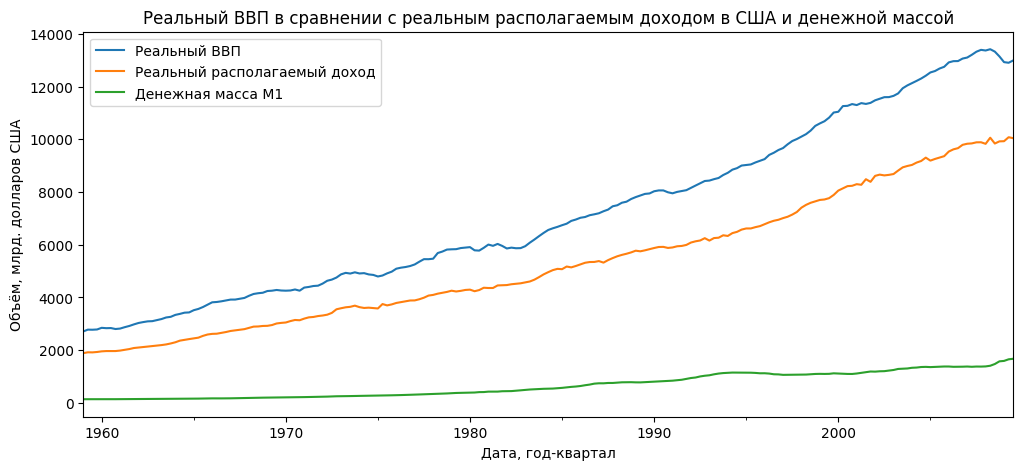

In [ ]:
plot = df2[['realgdp','realdpi', 'm1']].plot(figsize=(12,5))
plt.xlabel("Дата, год-квартал")
plt.ylabel("Объём, млрд. долларов США")
plt.title("Реальный ВВП в сравнении с реальным располагаемым доходом в США и денежной массой")
plot.autoscale(axis='x',tight=True)
plot.legend(['Реальный ВВП', 'Реальный располагаемый доход', 'Денежная масса М1'])

Из графика следует, что корреляция между реальным ВВП и реальным располагаемым доходом существует, на разных участках графика с разным коэффициентом, однако с одним знаком. Денежная масса пусть также едва заметно коррелирует, но размерность рядов слишком разная, чтобы делать выводы.

### Вывод по задаче 3


Мы подготовили датасет для дальнейшего анализа, а также выяснили, какие показатели в той или иной мере коррелируют между собой. Для прогнозирования моделями предсказаний выберем показатель реального ВВП "realgdp".

## Построение моделей, анализ результатов.

### Разделение датасета

Для работы с моделями для прогнозирования макроэкономических показателей предварительно будет необходимо разделить выборку на тренировочную и тестовую выборки. Разделим выборку, оставив для теста последние три года выборки. Для этого воспользуемся модулем train_test_split из пакета Scikit-learn

In [ ]:
train = df2.iloc[:191]
test = df2.iloc[191:204]

print(len(train))
print(len(test))

191
12


### Исследование ряда на статичность, автокорреляцию и сезонность

Предварительно проверим временной ряд на сезонность при помощи функции seasonal_decompose на примере реального ВВП.

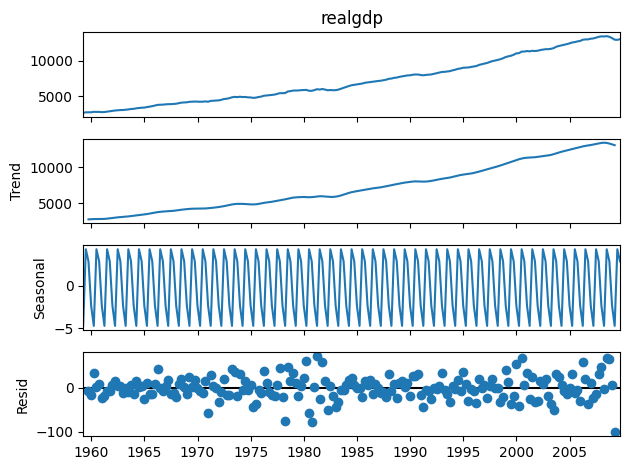

In [ ]:
ets = seasonal_decompose(df2['realgdp'], model='additive')
ets.plot();

Поскольку данные в датасете по реальному ВВП не были скорректированы по сезонности (корректировка была только в приведении кварталов к году), то мы **можем наблюдать логичные спады и рост** объема реального ВВП (смена времени года, отпуска сотрудников, праздничные дни).


---



Создадим графики автокорреляции и частичной автокорреляции.


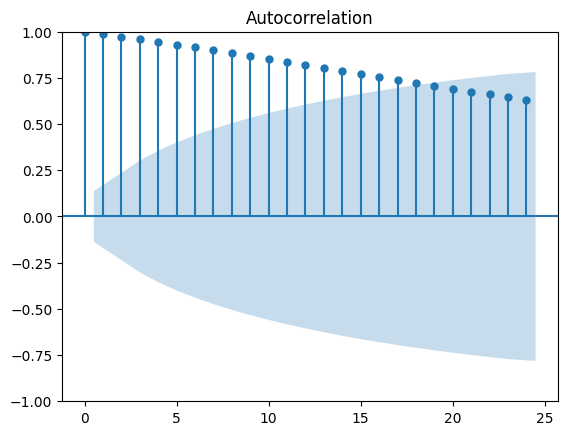

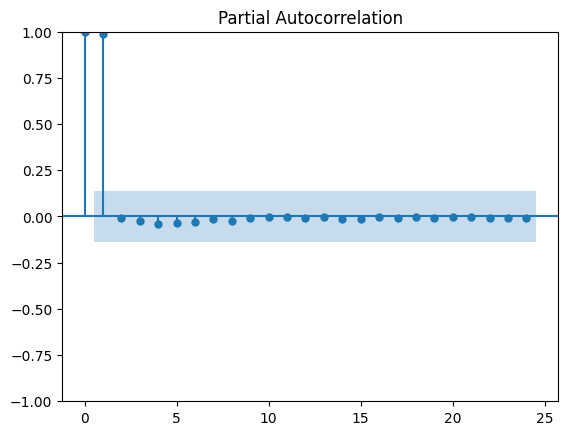

In [ ]:
acf = plot_acf(df2['realgdp'])
pacf = plot_pacf(df2['realgdp'])

Строго положительная автокорреляция и частичная корреляция внутри доверительного интервала показывает, что **данные взаимосвязаны**.

Также исследуем временной ряд на статичность с использованием теста Дики-Фуллера.


In [ ]:
result = adfuller(df2['realgdp'], autolag='AIC')

print('Критерий ADF: %.3f' % result[0])
print('P-значение: %.3f' % result[1])
print('Критические значения:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

Критерий ADF: 1.750
P-значение: 0.998
Критические значения:
	1%: -3.465
	5%: -2.877
	10%: -2.575


Поскольку критерий Дики-Фуллера больше критических значений, то мы можем заявить, что **временной ряд нестационарен**

### Модель 1 - SARIMA

Убедившись в том, что макроэкономические показатели подверждены сезонности, есть возможность применить модель SARIMA.

SARIMA - cезонное авторегрессионное интегрированное скользящее среднее - позволяет моделировать прогноз для временных рядов, характеризующихся сезонностью.


---



Первым делом необходимо подобрать параметры для модели SARIMA. Для этого воспользуемся функцией auto_arima пакета pmdarima, где мы сообщаем, что данные сезонны в рамках 4 кварталов.

In [ ]:
auto_arima(df2['realgdp'], seasonal=True, m=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  203
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1088.002
Date:                Sun, 26 Nov 2023   AIC                           2184.005
Time:                        17:10:43   BIC                           2197.218
Sample:                    03-31-1959   HQIC                          2189.351
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3288      0.053      6.147      0.000       0.224       0.434
ar.L2          0.1813      0.055      3.306      0.001       0.074       0.289
ma.L1         -0.9850      0.014    -70.394      0.000      -1.012      -0.958
sigma2      2908.5733    238.498     12.195      0.000    2441.126    3376.020
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.16
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Вопреки результатам функции seasonal_decompose, функция auto_arima не нашла параметров для сезонной составляющей, поэтому для модели SARIMA параметры будут выглядеть так: (2, 2, 1) х (0,0,0)[4]

Далее мы создаем модель на основании параметров. При создании модели в качестве данных для обучения мы используем тренировочную часть датасета

In [ ]:
model_SARIMA = SARIMAX(train['realgdp'], order=(2,2,1), seasonal_order=(0,0,0,4))
results = model_SARIMA.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                realgdp   No. Observations:                  191
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1006.629
Date:                Sun, 26 Nov 2023   AIC                           2021.258
Time:                        17:10:44   BIC                           2034.225
Sample:                    03-31-1959   HQIC                          2026.512
                         - 09-30-2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2117      0.073      2.903      0.004       0.069       0.355
ar.L2          0.2011      0.062      3.230      0.001       0.079       0.323
ma.L1         -0.9708      0.019    -50.854      0.000      -1.008      -0.933
sigma2      2447.2424    202.878     12.063      0.000    2049.608    2844.877
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.85
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               1.85   Skew:                             0.09
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Натренировав модель, рассмотрим её эффективность, построив предсказание на последний год (тестовая часть датасета)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Дата, год-квартал')

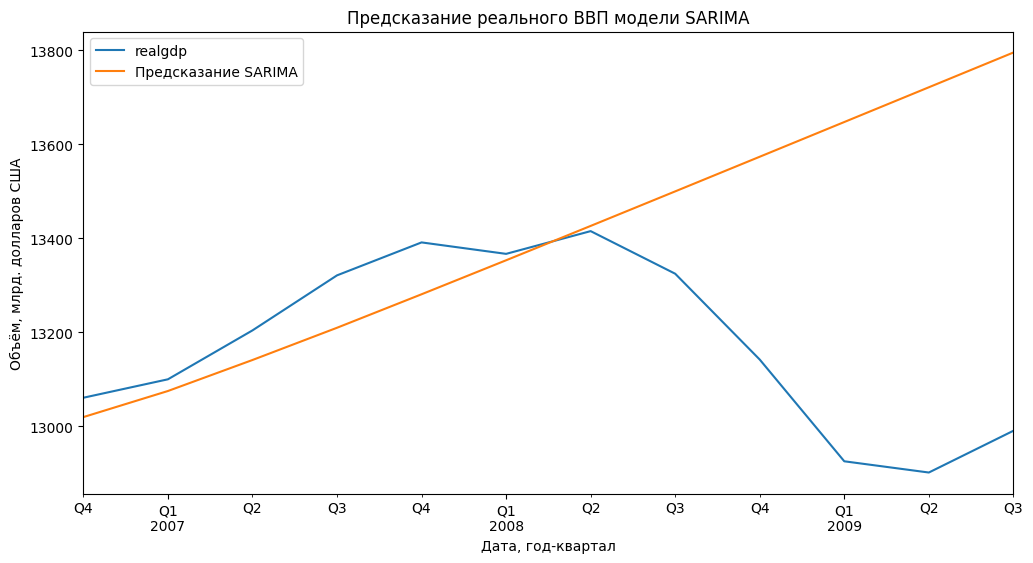

In [ ]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Предсказание SARIMA')

test['realgdp'].plot(figsize=(12,6), legend=True);
predictions.plot(figsize=(12,6), legend=True);
plt.ylabel("Объём, млрд. долларов США")
plt.title("Предсказание реального ВВП модели SARIMA")
plt.xlabel("Дата, год-квартал")

Модель, к сожалению, не учла произошедший в 2008 году мировой финансовый кризис, поэтому спад с середины 2008 не был предсказан; предполагался рост.


---



Оценим модель на точность средствами линейного регрессионного анализа, а именно с использованием функции среднеквадратичной ошибки и корня из неё.


In [ ]:
mse_value = mean_squared_error(test['realgdp'], predictions)
rmse_value = np.sqrt(mse_value)
mape_value = mean_absolute_percentage_error(test['realgdp'], predictions)

print(f'SARIMA MSE Error: {mse_value:11.10}')
print(f'SARIMA RMSE Error: {rmse_value:11.10}')
print(f'SARIMA MAPE Error: {mape_value:11.10}')

SARIMA MSE Error: 174159.1058
SARIMA RMSE Error: 417.3237422
SARIMA MAPE Error: 0.02130603057


Оставим показатели ошибок для сравнения со следующими моделями.

### Модель 2 - AR

Модель AR, или модель авторегрессии моделирует следующий шаг в последовательности как линейную функцию наблюдений на предыдущих временных шагах.


---



Для создания модели AR воспользуемся функцией AutoReg из пакета Statsmodels. В ней также можно задать наличие сезонности, период сезонности и шаг, с которой модель будет брать предыдущие данные для прогноза.

Возьмем шаг в единицу (будет использоваться каждый предыдущий шаг), а также снова сообщим сведения о сезонности, полученные в функции seasonal_decompose.

In [ ]:
model_AR = AutoReg(train['realgdp'], lags=1, seasonal=True, period=4)
model_fit = model_AR.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


Модель обучена, а теперь сделаем предсказание на основе модели в сравнении с тестовым датасетом.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Text(0.5, 0, 'Дата, год-квартал')

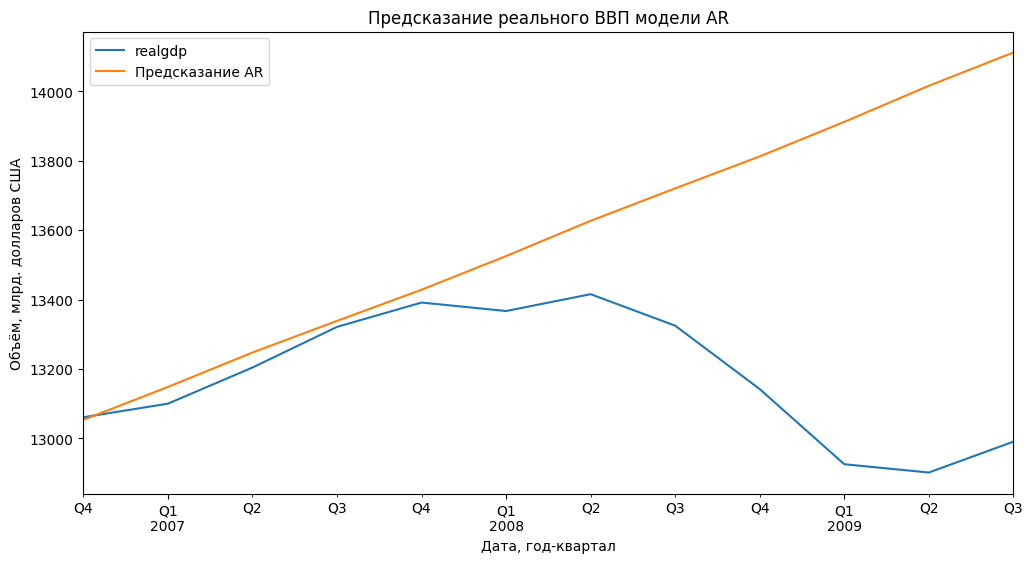

In [ ]:
prediction_AR = model_fit.predict(start=start, end=end).rename('Предсказание AR')

test['realgdp'].plot(figsize=(12,6), legend=True);
prediction_AR.plot(figsize=(12,6), legend=True);
plt.ylabel("Объём, млрд. долларов США")
plt.title("Предсказание реального ВВП модели AR")
plt.xlabel("Дата, год-квартал")

Мы наблюдаем нечто похожее на результат модели SARIMA: на моменте с ростом модель предсказывает плюс-минус верно, а момент со спадом игнорирует и растет дальше. Рассмотрим ошибку на этом этапе.

In [ ]:
mse_value = mean_squared_error(test['realgdp'], prediction_AR)
rmse_value = np.sqrt(mse_value)
mape_value = mean_absolute_percentage_error(test['realgdp'], prediction_AR)

print(f'AR MSE Error: {mse_value:11.10}')
print(f'AR RMSE Error: {rmse_value:11.10}')
print(f'AR MAPE Error: {mape_value:11.10}')

AR MSE Error: 346115.6784
AR RMSE Error: 588.3159682
AR MAPE Error: 0.03073920963


Среднеквардратичная ошибка на тестовых данных в сравнении с моделью AR оказалась в два раза выше, чем в сравнении с моделью SARIMA.

### Модель 3 - MA

Метод скользящего среднего (MA) моделирует следующий шаг в последовательности как линейную функцию остаточных ошибок от среднего процесса на предыдущих временных шагах.


---



Для создания модели MA воспользуемся функцией AutoReg из пакета Statsmodels.

В качестве параметров функции мы используем тренировочный датасет и порядок (0,0,1) - то есть, показатель авторегрессии - 0, разность временного порядка - 0, показатель скользящего среднего - 1 соответственно.

In [ ]:
model_MA = ARIMA(train['realgdp'], order=(0,0,1))
results_MA = model_MA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Text(0.5, 0, 'Дата, год-квартал')

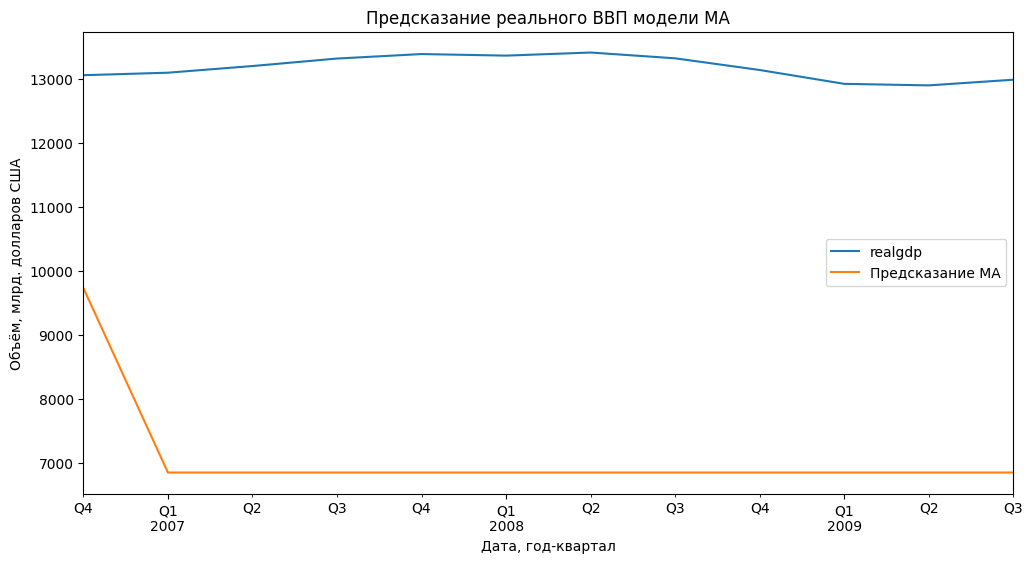

In [ ]:
prediction_MA = results_MA.predict(start=start, end=end).rename('Предсказание MA')

test['realgdp'].plot(figsize=(12,6), legend=True);
prediction_MA.plot(figsize=(12,6), legend=True);
plt.ylabel("Объём, млрд. долларов США")
plt.title("Предсказание реального ВВП модели MA")
plt.xlabel("Дата, год-квартал")

Модель MA показала не самые лучшие результаты. Традиционно проверим ошибки.

In [ ]:
mse_value = mean_squared_error(test['realgdp'], prediction_MA)
rmse_value = np.sqrt(mse_value)
mape_value = mean_absolute_percentage_error(test['realgdp'], prediction_MA)

print(f'AR MSE Error: {mse_value:11.10}')
print(f'AR RMSE Error: {rmse_value:11.10}')
print(f'AR MAPE Error: {mape_value:11.10}')

AR MSE Error: 37809352.42
AR RMSE Error: 6148.930998
AR MAPE Error: 0.4618364781


Ошибки явно выше, чем в предыдущих рассмотренных моделях.

### Вывод по задаче 4

Из трёх рассмотренных моделей наилучшие результаты на полном датасете данных показала модель AR, однако она не учитывает в полной мере сезонность наблюдаемого макроэкономического показателя. Таким образом, лучшей моделью для прогноза реального ВВП становится модель SARIMA.

Для хорошей работы модели попробуем обучить модель на полном датасете.

### Модель 4 - SARIMA на полном датасете

Поскольку параметры модели из функции auto_arima изначально рассчитывались на полный датасет, мы можем пропустить новый расчет и использовать параметры (2,2,1)х(0,0,0)[4] и для этой модели.

In [ ]:
model_SARIMA_full = SARIMAX(df2['realgdp'], order=(2,2,1), seasonal_order=(0,0,0,4))
results_full = model_SARIMA_full.fit(disp=0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Запускаем предсказание модели на полном датасете, и сравним с тестовым датасетом.

Text(0.5, 0, 'Дата, год-квартал')

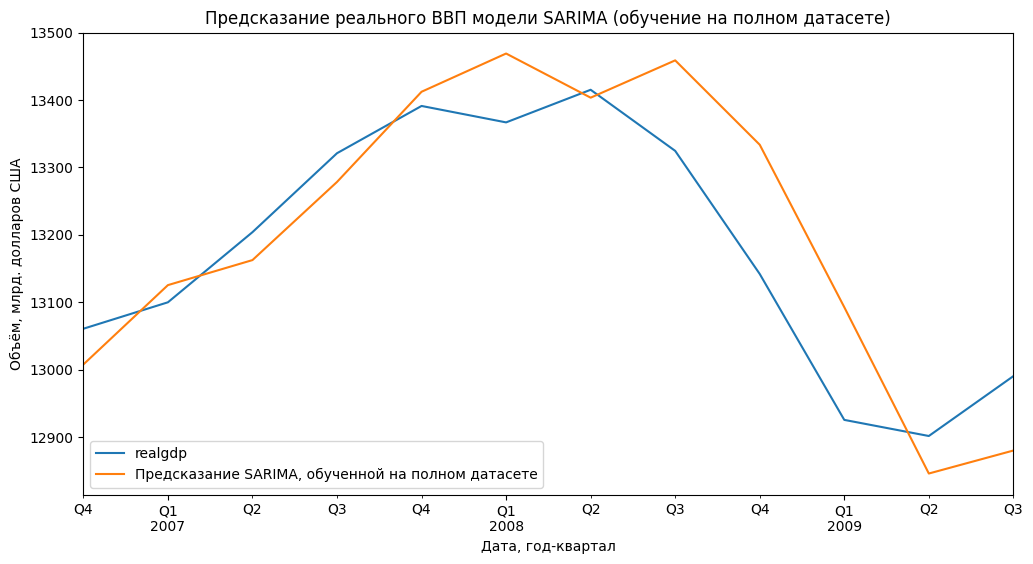

In [ ]:
start = len(train)
end = len(train)+len(test)-1
predictions_full = results_full.predict(start=start, end=end, dynamic=False, typ='levels').rename('Предсказание SARIMA, обученной на полном датасете')

test['realgdp'].plot(figsize=(12,6), legend=True);
predictions_full.plot(figsize=(12,6), legend=True);
plt.ylabel("Объём, млрд. долларов США")
plt.title("Предсказание реального ВВП модели SARIMA (обучение на полном датасете)")
plt.xlabel("Дата, год-квартал")

Визуально модель показывает наибольшую эффективность в настоящей работе. Проверим ошибки модели.

In [ ]:
mse_value = mean_squared_error(test['realgdp'], predictions_full)
rmse_value = np.sqrt(mse_value)
mape_value = mean_absolute_percentage_error(test['realgdp'], predictions_full)

print(f'SARIMA full dataset MSE Error: {mse_value:11.10}')
print(f'SARIMA full dataset RMSE Error: {rmse_value:11.10}')
print(f'SARIMA full dataset MAPE Error: {mape_value:11.10}')

SARIMA full dataset MSE Error: 9674.387705
SARIMA full dataset RMSE Error: 98.35846534
SARIMA full dataset MAPE Error: 0.006071977395


Модель, обученная на полном датасете, показала наименьшую ошибку.

### Прогноз последующих участков датасета

Поскольку самой эффективной моделью оказалась модель SARIMA, обученная на полном датасете, воспользуемся ей для прогноза будущего, а именно последующих участков датасета.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Объём, млрд. долларов США')

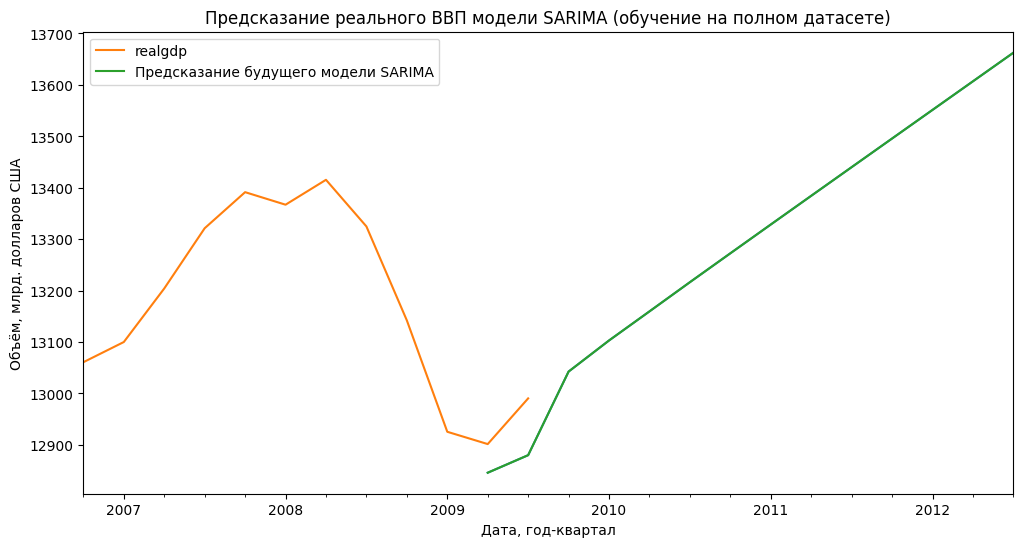

In [ ]:
fcast = results_full.predict(len(df)-2, len(df)+11, dynamic=False, typ='levels').rename('Предсказание будущего модели SARIMA')
fcast.plot();
test['realgdp'].plot(figsize=(12,5), legend=True);
fcast.plot(figsize=(12,6), legend=True);
plt.title("Предсказание реального ВВП модели SARIMA (обучение на полном датасете)")
plt.xlabel("Дата, год-квартал")
plt.ylabel("Объём, млрд. долларов США")

### Выводы по разделу

Мы проверили 3 разные модели предсказаний временных рядов: SARIMA, AR и MA. После промежуточного вывода об эффективности моделей было решено доучить модель SARIMA на полном датасете, благодаря чему ошибка модели была максимально уменьшена. График всех предсказаний в сравнении с фактом приведен ниже.

Text(0.5, 0, 'Дата, год-квартал')

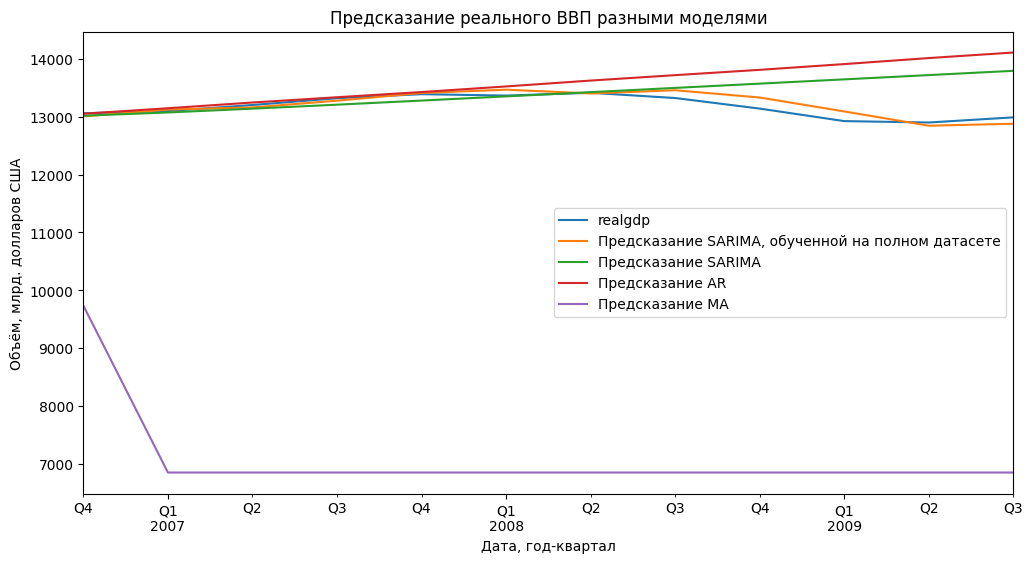

In [ ]:
test['realgdp'].plot(figsize=(12,6), legend=True);
predictions_full.plot(figsize=(12,6), legend=True);
predictions.plot(figsize=(12,6), legend=True);
prediction_AR.plot(figsize=(12,6), legend=True);
prediction_MA.plot(figsize=(12,6), legend=True);
plt.ylabel("Объём, млрд. долларов США")
plt.title("Предсказание реального ВВП разными моделями")
plt.xlabel("Дата, год-квартал")

## Выводы

В ходе работы были выполнены следующие задачи:
1. Были изучены основные макроэкономические показатели на примере США прошлых лет.
2. Были выявлены взаимосвязи между макроэкономическими показателями и были выбраны показатели для прогноза.
3. Были рассмотрены 3 модели предсказания показателей во временном ряду.
4. Были оценены ошибки моделей и выбрана наиболее соответствующая требованиям.

Возвращаясь к цели работы, было выяснено, что прогноз реального ВВП страны достаточно трудно составить опираясь только на ретроспективу. Возникают мировые форс-мажоры, которые также влияют на данный макроэкономический показатель. Возможно, использование моделей с больше, чем одним, показателем окажутся более эффективными.

Наиболее точно сработавшей моделью оказалась модель SARIMA, обученная на показателях прошедших 50 лет.